In [60]:
%load_ext autoreload
%autoreload 2
import data_manipulation
import pickle
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import adjust_sigmoid
from skimage import feature
from skimage.color import rgb2gray

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data_manipulation.datset_split()

ValueError: Pickles for the Trainig and Validation Set exist. Set exists to False,                to overwrite them.

In [5]:
with open("data/dataset_train.obj", "rb") as f:
    train = pickle.load(f)

# Healthy Lung

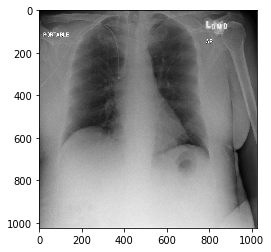

False

In [35]:
mask, class_ids = train.load_mask(0)
image = train.load_image(0)
plt.imshow(image)
plt.show()

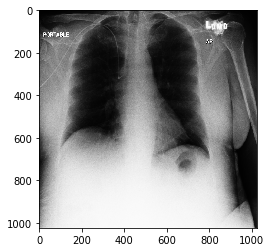

In [23]:
threshold_image = adjust_sigmoid(image)
plt.imshow(threshold_image)
plt.show()

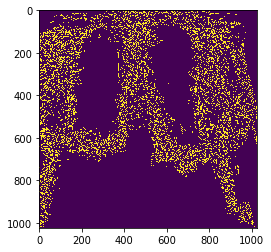

In [32]:
edge_detected = feature.canny(rgb2gray(threshold_image), sigma = 0.5)
plt.imshow(edge_detected)
plt.show()

# Lung Opacity

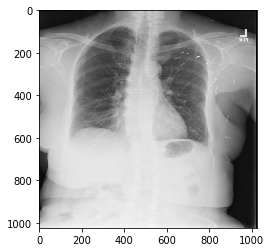

In [51]:
image_id = 15
mask, class_ids = train.load_mask(image_id)
image = train.load_image(image_id)
plt.imshow(image)
plt.show()

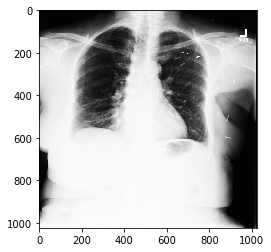

In [52]:
threshold_image = adjust_sigmoid(image)
plt.imshow(threshold_image)
plt.show()

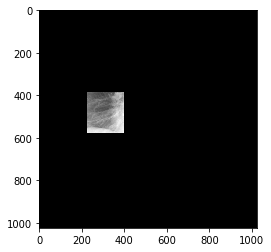

In [58]:
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')

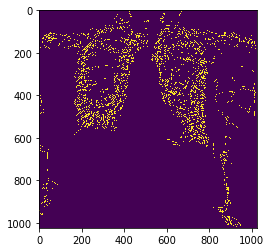

In [59]:
edge_detected = feature.canny(rgb2gray(threshold_image), sigma = 0.6)
plt.imshow(edge_detected)
plt.show()